#**EDA-1**
#Title: Bike Details Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("BIKE DETAILS.csv")

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [5]:
df.selling_price.isnull().sum()
df.selling_price.unique()


array([175000,  45000, 150000,  65000,  20000,  18000,  78500, 180000,
        30000,  50000,  35000,  28000,  80000, 365000, 185000,  25000,
        40000, 120000,  15000,  26000,  32000, 110000,  42000,  21000,
        55000,  38000,  43000,  62000,  60000,  90000, 125000,  85000,
        29900,  70000,  48000,  34000, 165000,  29500,  95000,   7500,
       160000, 140000,  22000,  22989,  24999,  75000,  17500,  57000,
        83900, 135000, 299000, 750000, 190000, 130000,  54786,  72000,
       100000, 138000, 170000, 123000,  23000,  41000,  47999,  36999,
        12000,  27000,  10000,  56000,  58000,  87000, 145000,   9000,
        14000,  17000, 210000,  54000, 260000,  98000, 200000, 195000,
       270000, 425000, 760000,  37000, 330000, 162000, 285000,  69000,
       300000,  26500,  78000,   8000,  39000,  36000,  16000,  83299,
        14700,  19000,  14900,  24000,  24700,  52000,  47000, 105000,
       115000,   5000,  86000,  28700,   6000,  23500,  68000,  20100,
      

In [6]:
df.drop_duplicates()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [7]:
df['ex_showroom_price'] = df.groupby('name')['ex_showroom_price'].transform(lambda x: x.fillna(x.median()))
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())
df.ex_showroom_price

,ex_showroom_price
0,147000.0
1,75000.0
2,148114.0
3,89643.0
4,75000.0
...,...
1056,52000.0
1057,51000.0
1058,57000.0
1059,58000.0


In [8]:
#->What is the range of selling prices in the datasetD
max=df.selling_price.max()
min=df.selling_price.min()
range=max-min
range

755000

In [9]:
#What is the median selling price for bikes in the dataset
df.selling_price.median()

45000.0

In [10]:
#What is the most common seller type
df.seller_type.mode()

,seller_type
0,Individual


In [11]:
# How many bikes have driven more than 50,000 kilometers
(df['km_driven']>50000).sum()

np.int64(170)

In [12]:
#What is the average km_driven value for each ownership type
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [13]:
#What proportion of bikes are from the year 2015 or older
a= (df['year'] <= 2015).sum()
b = len(df)
proportion=a/ b
proportion


np.float64(0.5664467483506126)

In [14]:
#What is the trend of missing values across the dataset
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


In [15]:
#What is the highest ex_showroom_price recorded, and for which bike
max_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_max_ex_showroom = df[df['ex_showroom_price'] == max_ex_showroom_price]['name']
bike_with_max_ex_showroom


,name
134,Harley-Davidson Street Bob


In [16]:
#What is the total number of bikes listed by each seller type
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [17]:
#What is the relationship between selling_price and km_driven for first-owner bikes
df[df['owner'].str.lower().str.contains("1st")]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,147000.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,75000.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [18]:
#Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
km_filtered_df = df[~((df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR)))]
km_filtered_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,147000.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,75000.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,75000.0
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


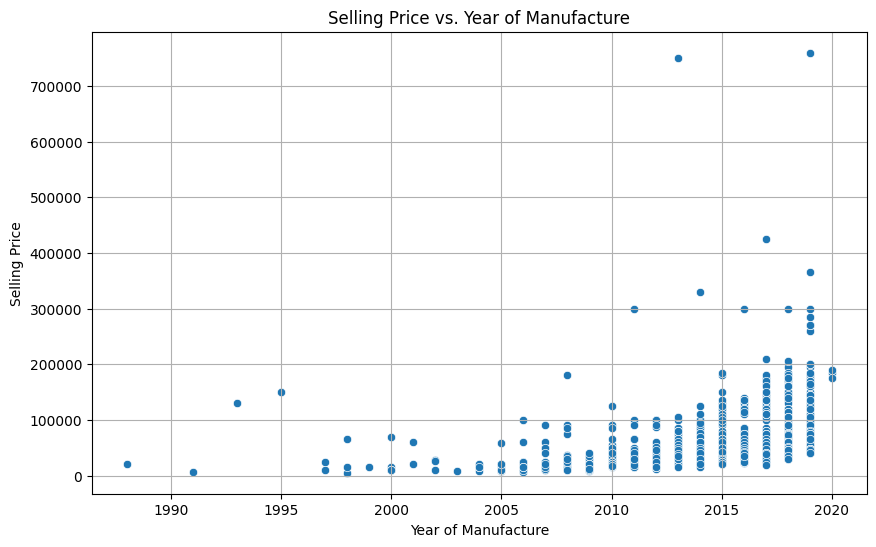

In [19]:
#Perform a bivariate analysis to visualize the relationship between year and selling_price
df.groupby('year')['selling_price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [20]:
#What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
current_year = 2025
df['bike_age'] = current_year - df['year']
average_price_by_age = df.groupby('bike_age')['selling_price'].mean().reset_index()
average_price_by_age

,bike_age,selling_price
0,5,183333.333333
1,6,119689.511628
2,7,87660.374046
3,8,78894.736842
4,9,58469.018692
5,10,56500.000000
6,11,48668.131868
7,12,51136.986301
8,13,35748.400000
9,14,35655.721311


In [21]:
#Which bike names are priced significantly above the average price for their manufacturing year

year_avg_prices = df.groupby('year')['selling_price'].mean()
df['year_avg'] = df['year'].map(year_avg_prices)
df['price_diff'] = df['selling_price'] - df['year_avg']
std_diff = df['price_diff'].std()
outliers_above_avg = df[df['price_diff'] > 2 * std_diff]
outliers_above_avg_bikes = outliers_above_avg[['name', 'year', 'selling_price', 'year_avg', 'price_diff']]
outliers_above_avg_bikes.sort_values(by='price_diff', ascending=False).reset_index(drop=True)

,name,year,selling_price,year_avg,price_diff
0,Harley-Davidson Street Bob,2013,750000,51136.986301,698863.013699
1,Suzuki GSX S750,2019,760000,119689.511628,640310.488372
2,Kawasaki Ninja 650 [2018-2019],2017,425000,78894.736842,346105.263158
3,Harley-Davidson Street 750,2014,330000,48668.131868,281331.868132
4,Kawasaki Ninja 650 [2018-2019],2011,300000,35655.721311,264344.278689
5,Yamaha YZF R3,2019,365000,119689.511628,245310.488372
6,Kawasaki Ninja 300,2016,300000,58469.018692,241530.981308
7,BMW G310GS,2018,300000,87660.374046,212339.625954
8,Royal Enfield Continental GT 650,2019,299000,119689.511628,179310.488372
9,Royal Enfield Interceptor 650,2019,285000,119689.511628,165310.488372


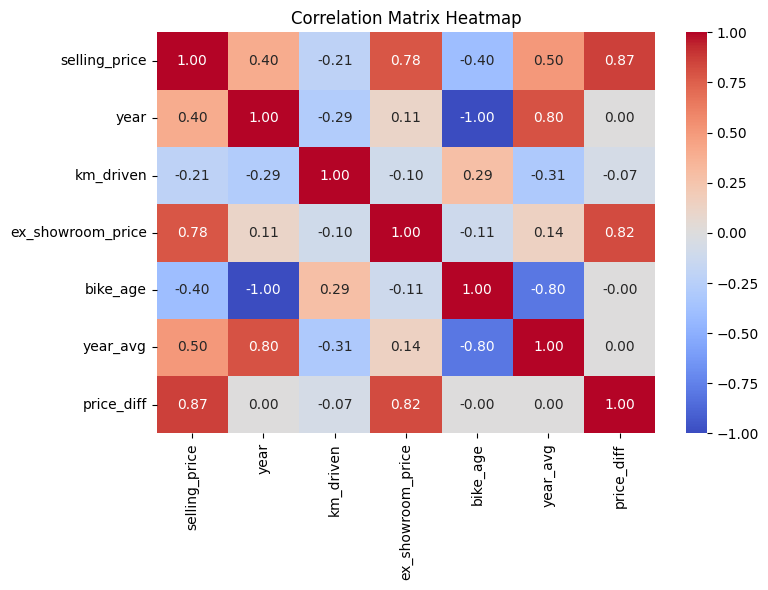

In [22]:
#Develop a correlation matrix for numeric columns and visualize it using a heatmap
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

#**EDA - 2**
#Title: Car Sale Dataset



In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
df=pd.read_csv('Car Sale.csv')

In [25]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [26]:
df['Customer Name']=df['Customer Name'].fillna(df['Customer Name'].mode()[0])
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [27]:
#What is the average selling price of cars for each dealer, and how does it compare across different dealers
df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


In [28]:
#Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


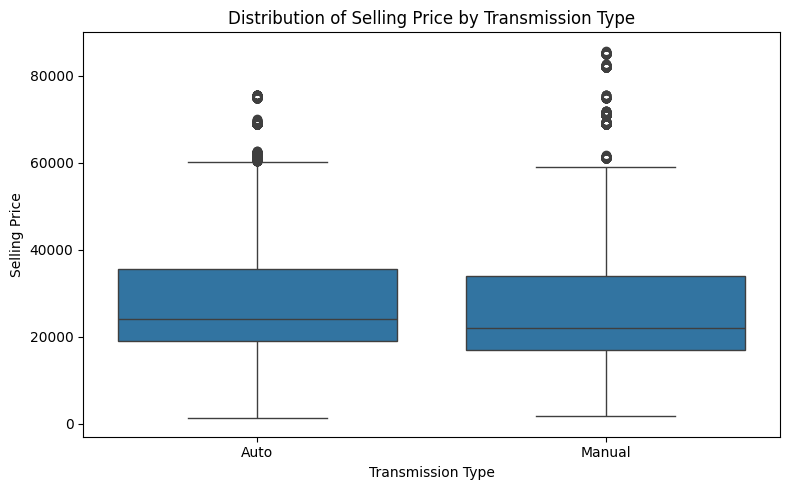

In [29]:
#What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Selling Price by Transmission Type')
plt.ylabel('Selling Price')
plt.xlabel('Transmission Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
def calculate_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    return Q3 - Q1
iqr_by_transmission = df.groupby('Transmission')['Price ($)'].apply(calculate_iqr)
print(iqr_by_transmission)

Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


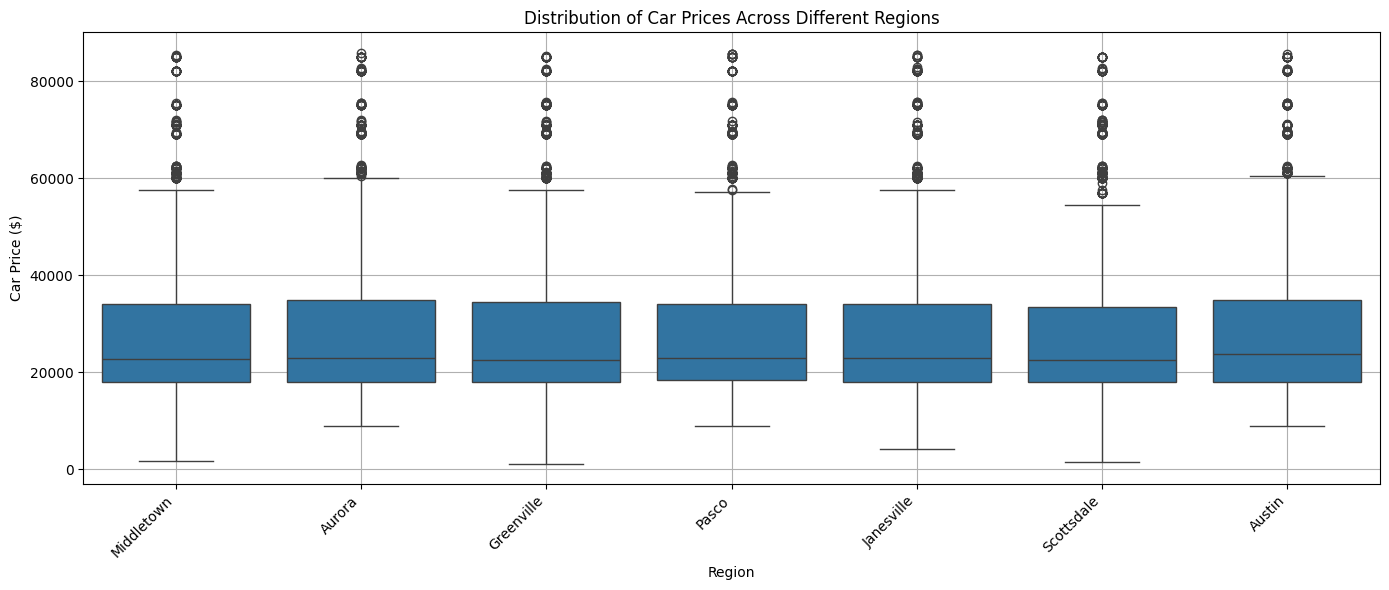

In [31]:
#What is the distribution of car prices across different regions
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Car Price ($)')
plt.tight_layout()
plt.grid(True)
plt.show()

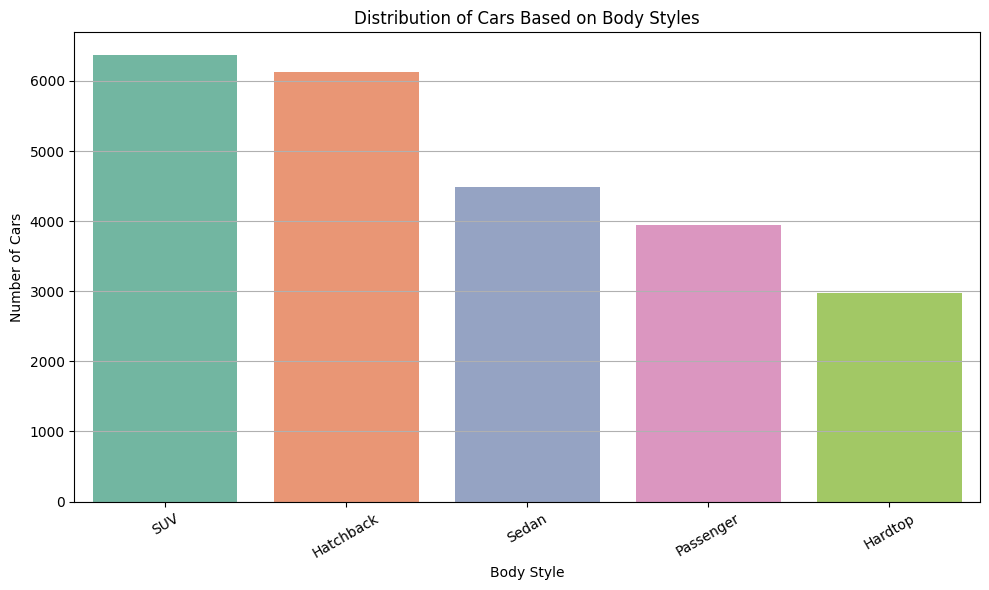

In [32]:
#What is the distribution of cars based on body styles

body_style_counts = df['Body Style'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='Set2')
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


In [33]:
#How does the average selling price of cars vary by customer gender and annual income
df.groupby('Gender')[['Price ($)', 'Annual Income']].mean().reset_index()


,Gender,Price ($),Annual Income
0,Female,28277.265270,755973.021339
1,Male,28039.429407,851184.044207


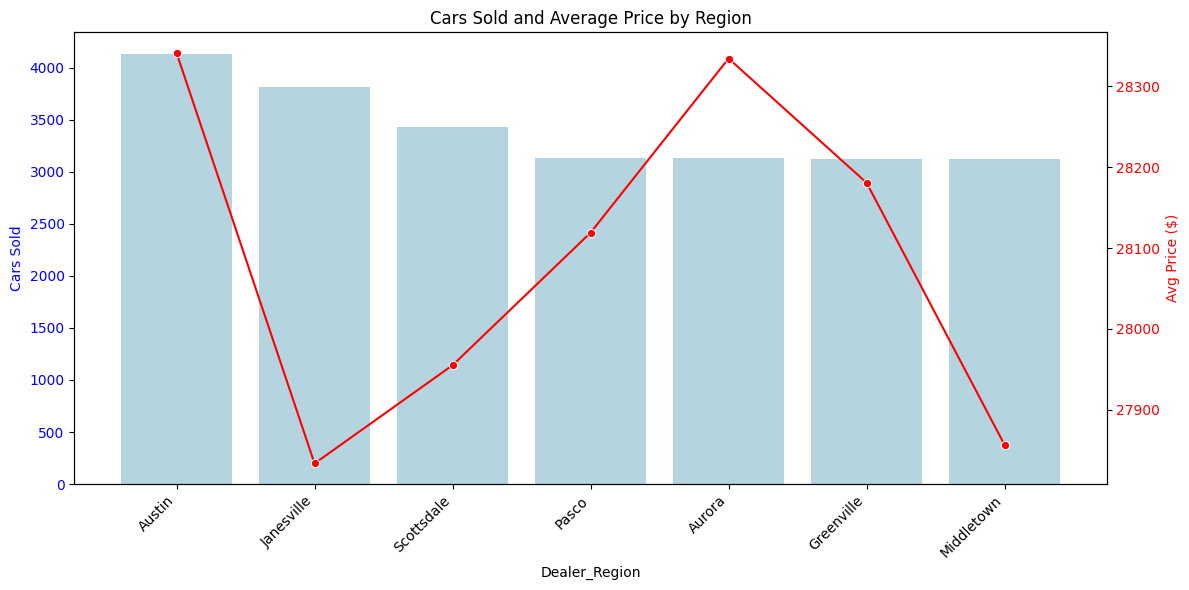

In [34]:
#What is the distribution of car prices by region, and how does the number of cars sold vary by region
summary = df.groupby('Dealer_Region').agg(Avg_Price=('Price ($)', 'mean'),Car_Count=('Car_id', 'count')).reset_index().sort_values('Car_Count', ascending=False)
ig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Dealer_Region', y='Car_Count', data=summary, ax=ax1, color='lightblue')
ax1.set_ylabel('Cars Sold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(x='Dealer_Region', y='Avg_Price', data=summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Avg Price ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Cars Sold and Average Price by Region')
plt.tight_layout()
plt.show()

In [35]:
#How does the average car price differ between cars with different engine sizes
df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [36]:
# How do car prices vary based on the customer’s annual income bracket
p=df.groupby('Income Bracket')['Price ($)'].mean()
p

KeyError: 'Income Bracket'

In [ ]:
#What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_models = df['Model'].value_counts().head(5).index

top_models_df = df[df['Model'].isin(top_models).sort_values(ascending=False)]
top_models_df.head(5)

In [ ]:
#How does car price vary with engine size across different car colors, and which colors have the highest price variation
plt.figure(figsize=(12,6))
sns.scatterplot(x="Engine", y="Price ($)", hue="Color", data=df, alpha=0.7)
plt.title("Car Price vs Engine Size Across Colors")
plt.xticks(rotation=45)
plt.show()

price_variation = df.groupby("Color")["Price ($)"].std().sort_values(ascending=False)
print("Price Variation by Color:\n", price_variation)

In [ ]:
#Is there any seasonal trend in car sales based on the date of sale
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Car_id'].count()
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar')
plt.title("Seasonal Trend in Car Sales (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.show()

In [ ]:
#How does the car price distribution change when considering different combinations of body style and transmission type

plt.figure(figsize=(12,6))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.grid()
plt.show()


In [ ]:
df

In [ ]:
#What is the correlation between car price, engine size, and annual income of customers, and how do these features interac

corr = df[['Price ($)', 'Annual Income']].corr()
print(corr)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x="Engine", y="Price ($)", data=df)
plt.title("Car Price Distribution by Engine Type")
plt.show()

engine_stats = df.groupby("Engine")[["Price ($)", "Annual Income"]].mean()
print(engine_stats.sort_values("Price ($)", ascending=False).head(10))



In [ ]:
# How does the average car price vary across different car models and engine types
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

avg_price = df.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()

print(avg_price.head(10))

pivot_table = avg_price.pivot(index="Model", columns="Engine", values="Price ($)")

plt.figure(figsize=(14,8))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5)
plt.title("Average Car Price by Model and Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Car Model")
plt.show()


#**EDA - 3**
#Title: Amazon Sales Data

In [37]:
df=pd.read_csv("amazon.csv")

In [38]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [39]:
#What is the average rating for each product category
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.groupby('category')['rating'].mean().reset_index()

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [40]:
## Clean the rating_count column (remove commas and convert to integer)
df['rating_count_clean'] = df['rating_count'].str.replace(',', '', regex=True).astype(float)
df['main_category'] = df['category'].str.split('|').str[0]
top3_products = (
    df.sort_values(by='rating_count_clean', ascending=False)
      .groupby('main_category')
      .head(3)[['main_category', 'product_name', 'rating_count_clean']]
)

top3_products


,main_category,product_name,rating_count_clean
47,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
65,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
12,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
1028,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0
588,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0
718,Computers&Accessories,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive...,189104.0
143,Computers&Accessories,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692.0
1022,Home&Kitchen,Pigeon by Stovekraft Amaze Plus Electric Kettl...,123365.0
613,MusicalInstruments,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,68664.0
1031,Home&Kitchen,"Prestige Electric Kettle PKOSS - 1500watts, St...",63350.0


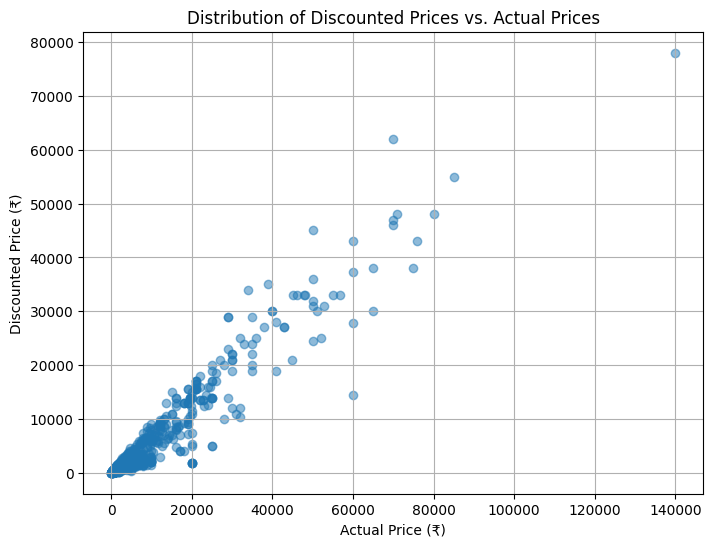

In [41]:
#What is the distribution of discounted prices vs. actual prices
df['discounted_price_clean'] = (
    df['discounted_price'].str.replace('₹','', regex=True)
                          .str.replace(',','', regex=True)
                          .astype(float)
)
df['actual_price_clean'] = (
    df['actual_price'].str.replace('₹','', regex=True)
                      .str.replace(',','', regex=True)
                      .astype(float)
)
plt.figure(figsize=(8,6))
plt.scatter(df['actual_price_clean'], df['discounted_price_clean'], alpha=0.5)
plt.xlabel("Actual Price (₹)")
plt.ylabel("Discounted Price (₹)")
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.grid(True)
plt.show()


In [42]:
#How does the average discount percentage vary across categories
df['discount_percentage_clean'] = (
    df['discount_percentage'].str.replace('%','', regex=True).astype(float)
)
df['main_category'] = df['category'].str.split('|').str[0]
avg_discount_by_category = (
    df.groupby('main_category')['discount_percentage_clean']
      .mean()
      .reset_index()
      .sort_values(by='discount_percentage_clean', ascending=False)
)

print(avg_discount_by_category)


           main_category  discount_percentage_clean
5        HomeImprovement                  57.500000
1  Computers&Accessories                  54.024283
3    Health&PersonalCare                  53.000000
2            Electronics                  50.828897
6     MusicalInstruments                  46.000000
0          Car&Motorbike                  42.000000
4           Home&Kitchen                  40.120536
7         OfficeProducts                  12.354839
8             Toys&Games                   0.000000


In [43]:
#What are the most popular product names
df['rating_count_clean'] = df['rating_count'].str.replace(',', '', regex=True).astype(float)
most_popular_products = (
    df[['product_name', 'rating_count_clean']]
      .sort_values(by='rating_count_clean', ascending=False)
      .head(10)
)
print(most_popular_products)


                                          product_name  rating_count_clean
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...            426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...            426973.0
12   AmazonBasics Flexible Premium HDMI Cable (Blac...            426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...            426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...            363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...            363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...            363711.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...            313836.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...            313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...            313832.0


In [44]:
#What are the most popular product keywords
from collections import Counter
import re
all_names = " ".join(df['product_name'].astype(str))
words = re.findall(r'\b\w+\b', all_names.lower())
stopwords = set([
    "with","for","and","in","to","of","by","on","from","is","a","an",
    "the","at","or","as","up","plus"
])
filtered_words = [w for w in words if w not in stopwords]
word_counts = Counter(filtered_words)
top_keywords = word_counts.most_common(20)
print(top_keywords)

[('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('c', 289), ('3', 275), ('2', 267), ('charging', 247), ('type', 243), ('fast', 212), ('smart', 175), ('white', 170), ('tv', 152), ('compatible', 146), ('5', 137), ('data', 136), ('hd', 135), ('4', 133), ('led', 129), ('8', 125)]


In [47]:
#What are the most popular product reviews
all_review_contents = ",".join(df['review_content'].astype(str)).split(",")
content_counts = Counter([content.strip().lower() for content in all_review_contents])
top_review_contents =content_counts.most_common(20)
print(top_review_contents)


[[('good', 424), ('', 396), ('good product', 213), ('nice', 130), ('nice product', 123), ('value for money', 122), ('ok', 65), ('good quality', 61), ('easy to use', 56), ('like', 36), ('good one', 36), ('very good', 33), ('very good product', 29), ('product is good', 23), ('i like this product', 22), ('very nice', 18), ('go for it', 17), ('good product.', 16), ('working fine', 16), ('good 👍', 15)]]


In [48]:
#What is the correlation between discounted_price and rating
# Clean discounted_price and rating columns
df['discounted_price_clean'] = (
    df['discounted_price'].str.replace('₹','', regex=True)
                          .str.replace(',','', regex=True)
                          .astype(float)
)
df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')
correlation = df['discounted_price_clean'].corr(df['rating_clean'])
print(correlation)


0.12033741712288548


In [49]:
# What are the Top 5 categories based on the highest rating
df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')
df['main_category'] = df['category'].str.split('|').str[0]
avg_rating_by_category = (
    df.groupby('main_category')['rating_clean']
      .mean()
      .reset_index()
      .sort_values(by='rating_clean', ascending=False)
      .head(5)
)

print(avg_rating_by_category)


           main_category  rating_clean
7         OfficeProducts      4.309677
8             Toys&Games      4.300000
5        HomeImprovement      4.250000
1  Computers&Accessories      4.154967
2            Electronics      4.081749


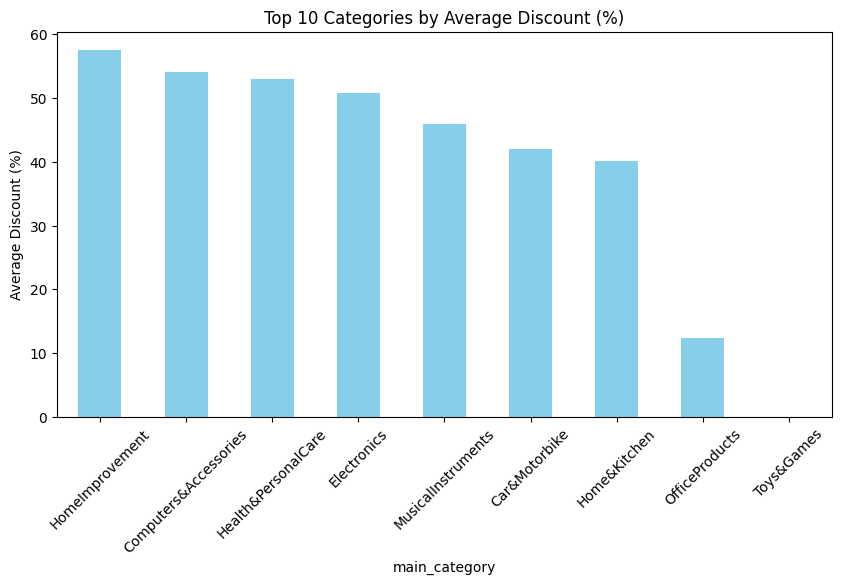

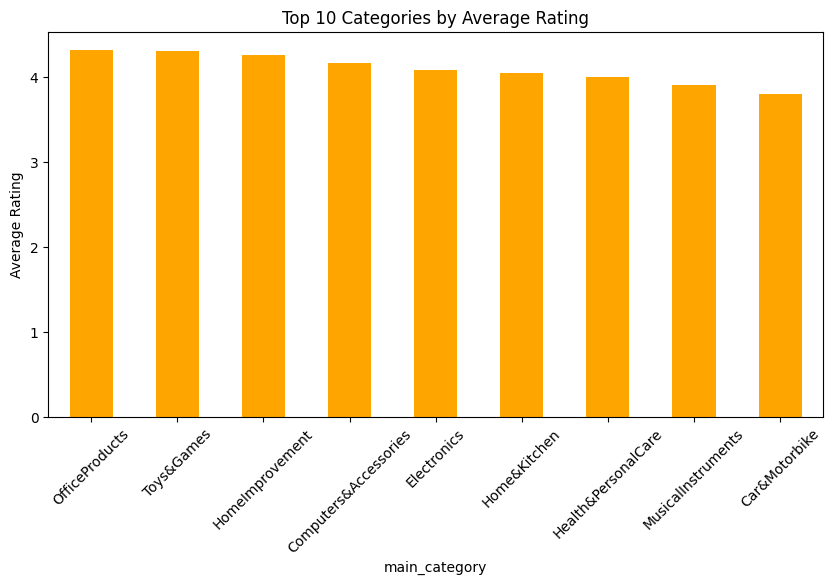

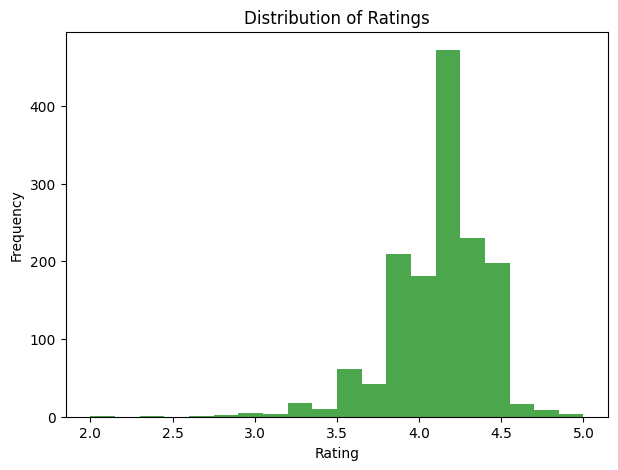

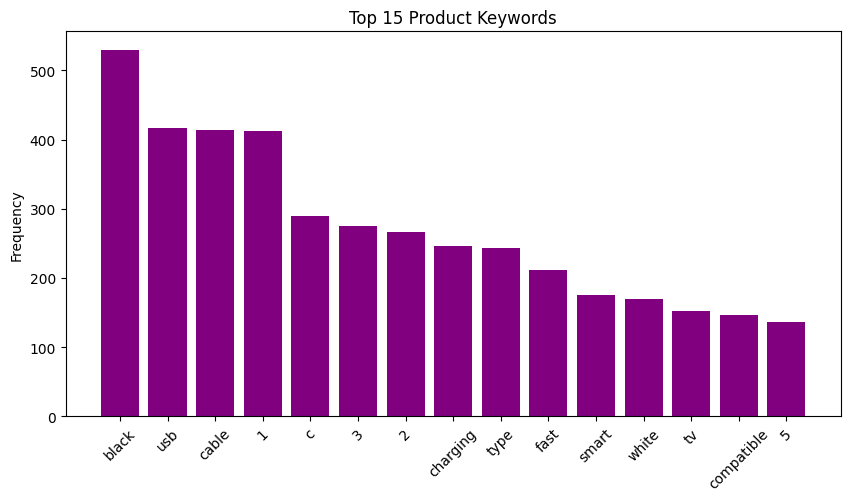

In [52]:
#Identify any potential areas for improvement or optimization based on the data analysis
import matplotlib.pyplot as plt
from collections import Counter
import re

# Clean columns
df['discount_percentage_clean'] = df['discount_percentage'].str.replace('%','', regex=True).astype(float)
df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')
df['main_category'] = df['category'].str.split('|').str[0]

# --- 1. Average Discount by Category ---
avg_discount = (
    df.groupby('main_category')['discount_percentage_clean']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
avg_discount.plot(kind='bar', color='skyblue')
plt.title("Top 10 Categories by Average Discount (%)")
plt.ylabel("Average Discount (%)")
plt.xticks(rotation=45)
plt.show()

# --- 2. Average Rating by Category ---
avg_rating = (
    df.groupby('main_category')['rating_clean']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
avg_rating.plot(kind='bar', color='orange')
plt.title("Top 10 Categories by Average Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# --- 3. Rating Distribution ---
plt.figure(figsize=(7,5))
df['rating_clean'].plot(kind='hist', bins=20, color='green', alpha=0.7)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# --- 4. Most Common Product Keywords ---
all_names = " ".join(df['product_name'].astype(str))
words = re.findall(r'\b\w+\b', all_names.lower())
stopwords = set(["with","for","and","in","to","of","by","on","from","is","a","an","the","at","or","as","up","plus"])
filtered_words = [w for w in words if w not in stopwords]
word_counts = Counter(filtered_words).most_common(15)

keywords, counts = zip(*word_counts)
plt.figure(figsize=(10,5))
plt.bar(keywords, counts, color='purple')
plt.title("Top 15 Product Keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


#**EDA - 4**
#Title-Spotify Data

In [55]:
#Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
import pandas as pd

spotify_df = pd.read_csv("spotify.csv")
print(spotify_df.isnull().sum())
spotify_df = spotify_df.dropna()
print(spotify_df.duplicated().sum())
spotify_df = spotify_df.drop_duplicates()
print(spotify_df.shape)
print(spotify_df.head())



Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
27
(413, 5)
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


In [67]:
spotify_df.columns


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

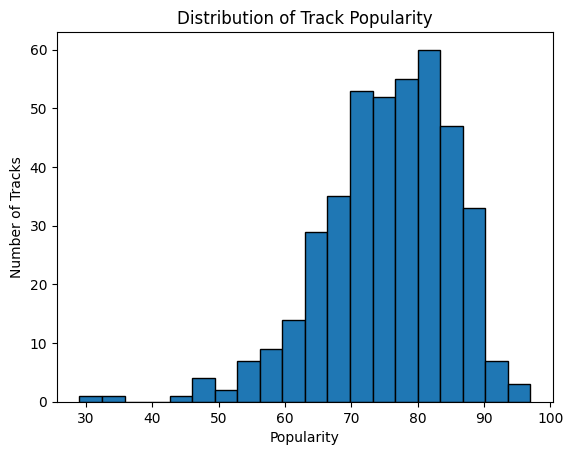

In [57]:
# What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
import matplotlib.pyplot as plt

plt.hist(spotify_df['Popularity'], bins=20, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.show()


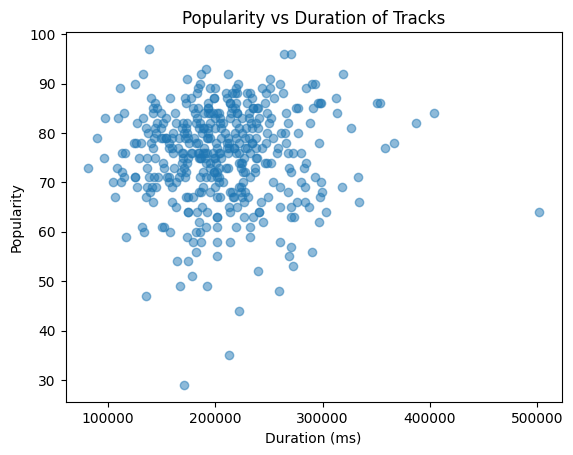

In [60]:
#Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.scatter(spotify_df['Duration (ms)'], spotify_df['Popularity'], alpha=0.5)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Popularity vs Duration of Tracks')
plt.show()


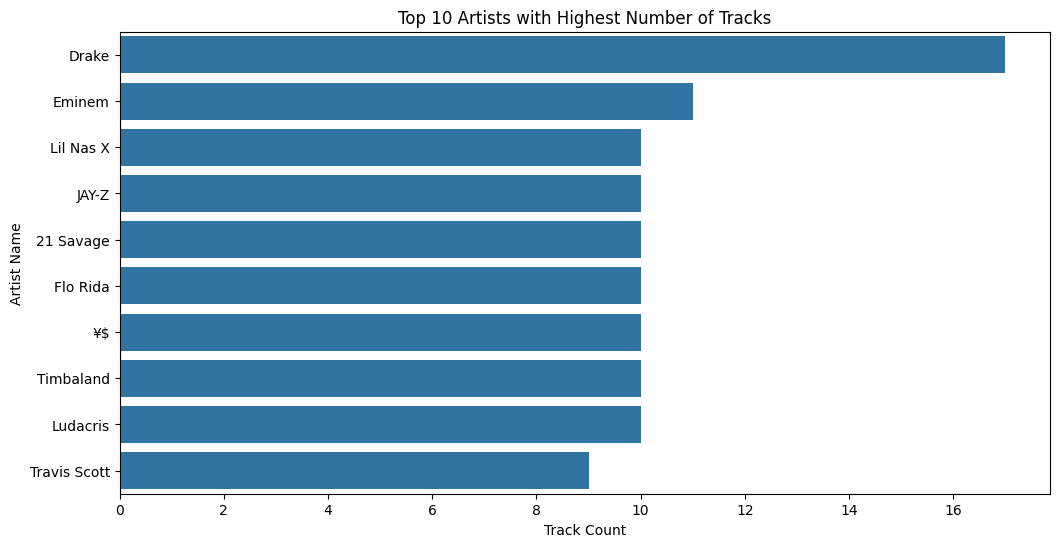

In [71]:
#Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
artist_counts = spotify_df['Artist'].value_counts().reset_index()
artist_counts.columns = ['artist_name', 'track_count']

plt.figure(figsize=(12,6))
sns.countplot(data=spotify_df, y='Artist', order=spotify_df['Artist'].value_counts().index[:10])
plt.title("Top 10 Artists with Highest Number of Tracks")
plt.xlabel("Track Count")
plt.ylabel("Artist Name")
plt.show()



In [74]:
#What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

least_popular = spotify_df.sort_values(by='Popularity', ascending=True).head(5)

least_popular_tracks = least_popular[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [77]:
#Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and +display the average popularity for each artist
artist_popularity = spotify_df.groupby('Artist')['Popularity'].mean().reset_index()
top5_artists = artist_popularity.sort_values(by='Popularity', ascending=False).head(5)
print(top5_artists)


           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   86.555556
114            ¥$   85.100000


In [84]:
#For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
artist_popularity = spotify_df.groupby('Artist')['Popularity'].mean().reset_index()
top5_artists = artist_popularity.sort_values(by='Popularity', ascending=False).head(5)['Artist']
most_popular_tracks = spotify_df.loc[spotify_df.groupby('Artist')['Popularity'].idxmax()]
top5_most_popular_tracks = most_popular_tracks[most_popular_tracks['Artist'].isin(top5_artists)][['Artist', 'Track Name', 'Popularity']]
print(top5_most_popular_tracks)




           Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


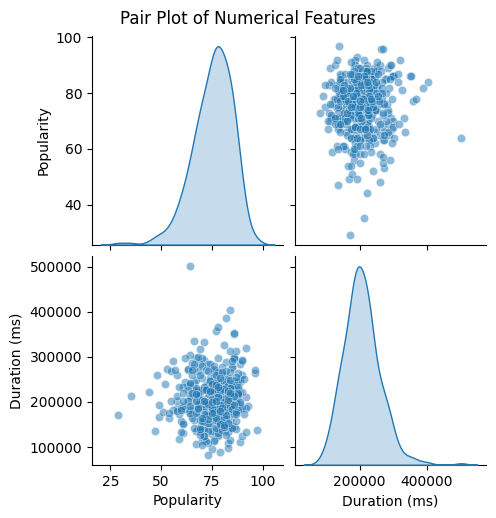

In [87]:
#Visualize relationships between multiple numerical variables simultaneously using a pair plot
import seaborn as sns
import matplotlib.pyplot as plt

del min
num_cols = spotify_df.select_dtypes(include=['int64', 'float64']).columns
sample_df = spotify_df[num_cols].sample(n=min(500, spotify_df.shape[0]), random_state=42)
sns.pairplot(sample_df, diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()



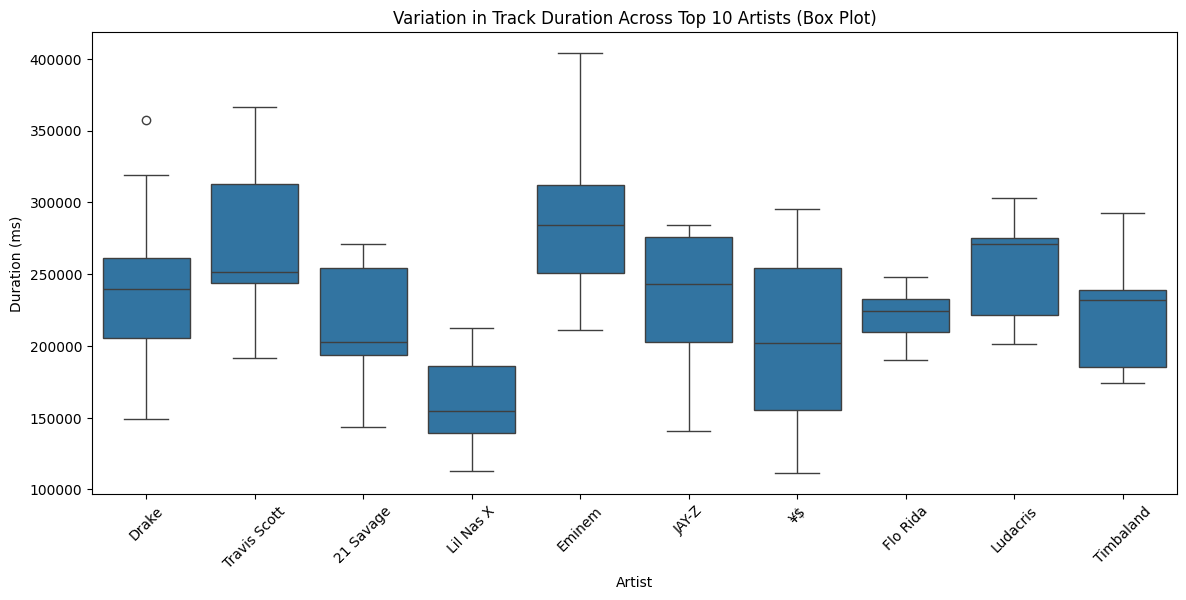

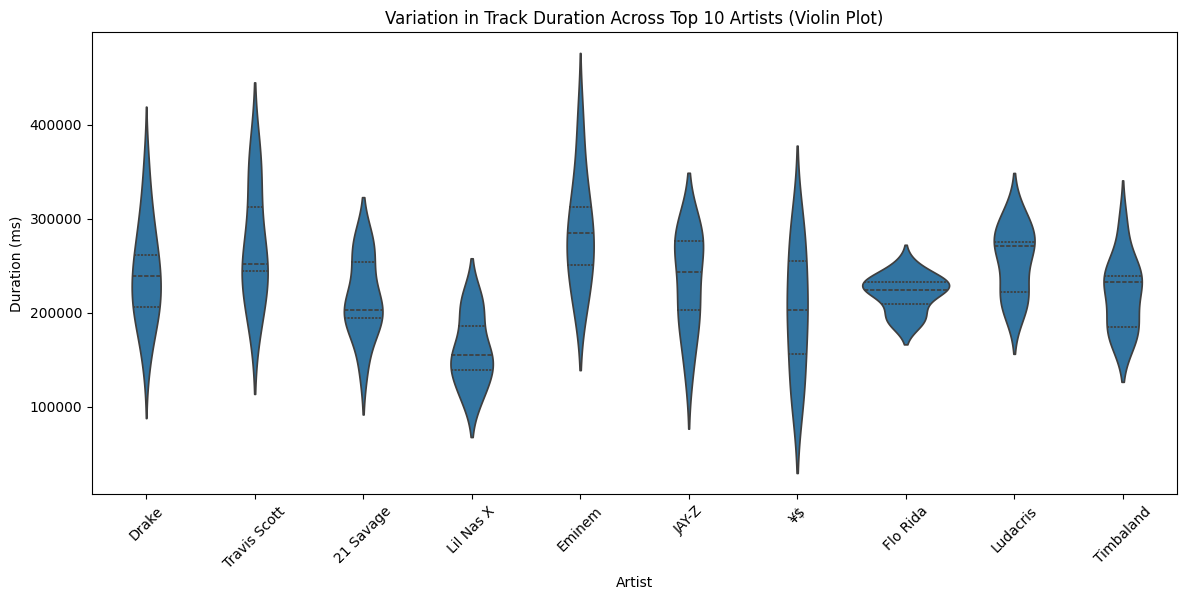

In [90]:
#Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
import seaborn as sns
import matplotlib.pyplot as plt
top_artists = spotify_df['Artist'].value_counts().head(10).index
artist_subset = spotify_df[spotify_df['Artist'].isin(top_artists)]

plt.figure(figsize=(14,6))
sns.boxplot(data=artist_subset, x='Artist', y='Duration (ms)')
plt.xticks(rotation=45)
plt.title("Variation in Track Duration Across Top 10 Artists (Box Plot)")
plt.show()

plt.figure(figsize=(14,6))
sns.violinplot(data=artist_subset, x='Artist', y='Duration (ms)', inner="quartile")
plt.xticks(rotation=45)
plt.title("Variation in Track Duration Across Top 10 Artists (Violin Plot)")
plt.show()


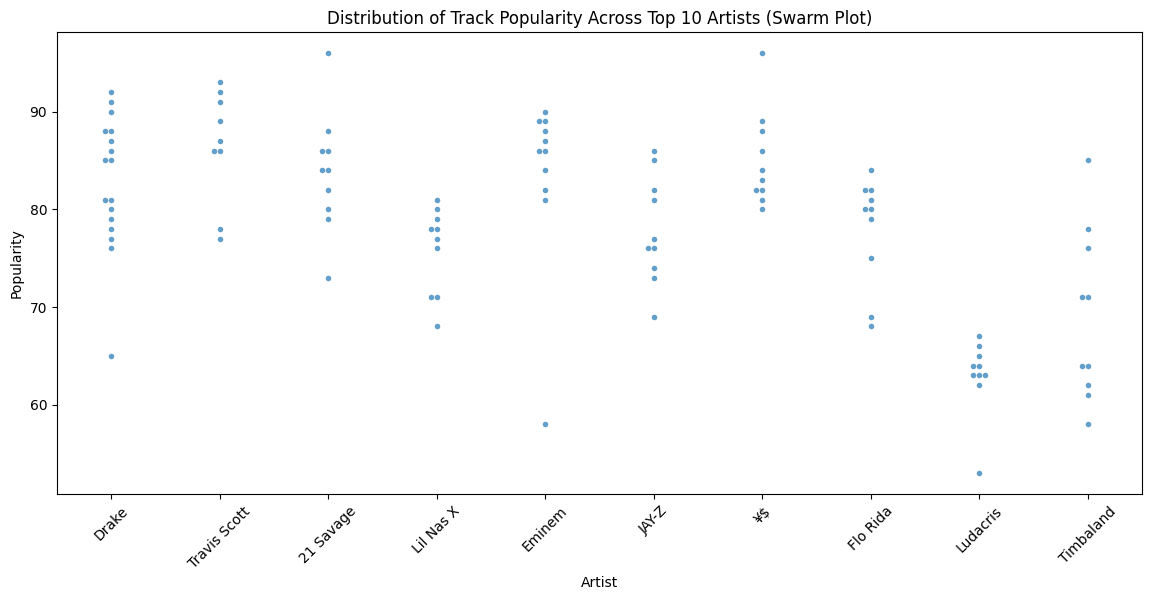

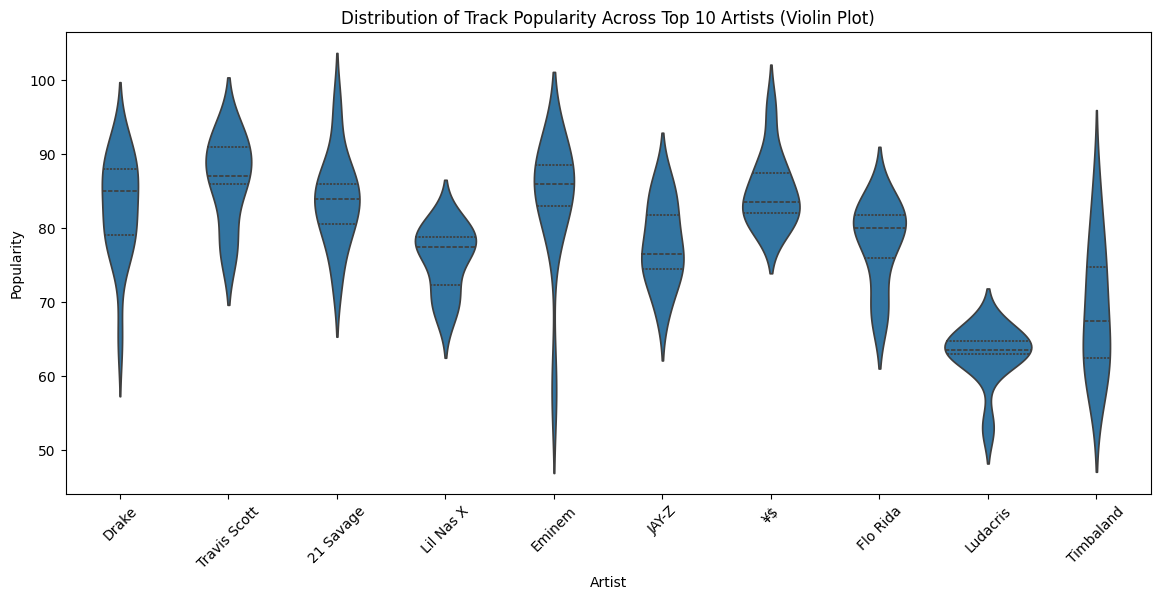

In [93]:
#How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
import seaborn as sns
import matplotlib.pyplot as plt
top_artists = spotify_df['Artist'].value_counts().head(10).index
artist_subset = spotify_df[spotify_df['Artist'].isin(top_artists)]
plt.figure(figsize=(14,6))
sns.swarmplot(data=artist_subset, x="Artist", y="Popularity", size=4, alpha=0.7)
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity Across Top 10 Artists (Swarm Plot)")
plt.show()
plt.figure(figsize=(14,6))
sns.violinplot(data=artist_subset, x="Artist", y="Popularity", inner="quartile")
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity Across Top 10 Artists (Violin Plot)")
plt.show()
